<a href="https://colab.research.google.com/github/antoinexp/markov-chains-COM-516/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is provided as a starting point to help you generate random instances G1 and G2 as mentioned in the handout.

You are free to use and modify it at your own convenience.

---



In [1]:
import scipy.stats as st
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class DatasetGenerator(object):
    def __init__(self, N=100):
        self.N = N
        self.x = None
        self.v = None
        self.refresh()

    def refresh(self):
        raise Exception("undefined")

In [3]:
class G1(DatasetGenerator):
    def refresh(self):
        self.x = st.uniform().rvs((self.N,2))
        self.v = st.uniform().rvs((self.N,))

In [4]:
class G2(DatasetGenerator):
    def refresh(self):
        self.x = st.uniform().rvs((self.N,2))
        self.v = np.exp(st.norm(-0.85, 1.3).rvs((self.N,)))

### Uniform distribution ($\mathcal U([0,1])$)

In [5]:
g1 = G1(100)

Examples:

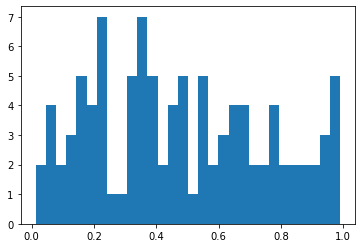

numpy.ndarray

In [6]:
# Plot a histogram of the v array
plt.hist(g1.v, bins=30)
plt.show()
type(g1.v)

/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


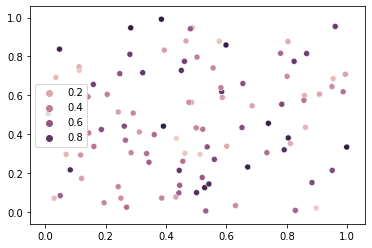

In [7]:
# plot the position of the points
# plt.figure(figsize=(5,5))
sns.scatterplot(g1.x[:,0], g1.x[:,1], hue=g1.v)
plt.show()

You can refresh the dataset

In [8]:
g1.refresh() # generate a new dataset

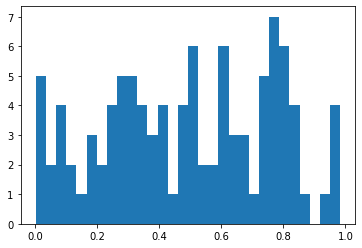

In [9]:
plt.hist(g1.v, bins=30)
plt.show()

Or for instance, you can generate 10 instances and compute the average position of all the points:

In [10]:
m = np.array([0., 0.])

for _ in range(10):
  g1.refresh() # refresh the dataset
  m  += 0.1*g1.x.mean()

print(m)

[0.49543372 0.49543372]


### Test on log-normal distribution

In [11]:
g2 = G2()

Example:

you can use g2 to generate an instance of the lognormal distribution

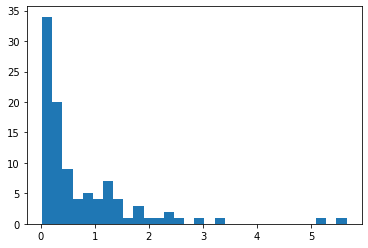

In [12]:
plt.hist(g2.v, bins=30)
plt.show()

/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


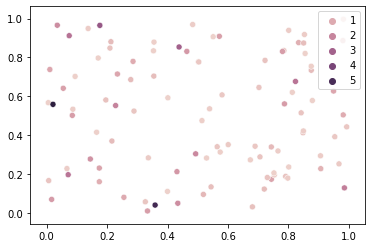

In [13]:
# plot the position of the points
# plt.figure(figsize=(5,5))
sns.scatterplot(g2.x[:,0], g2.x[:,1], hue=g2.v)
plt.show()

In [14]:
g2.refresh() # to generate a new x and v

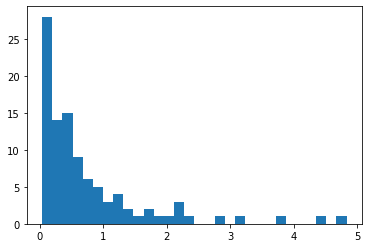

In [15]:
plt.hist(g2.v, bins=30)
plt.show()

---

### Metropolis Hastings

In [16]:
# fill-in this section with your code

from SimulatedAnnealingbis import SimulatedAnnealing
import SimulatedAnnealing as sim_an

In [17]:
print(g1.x.shape)

(100, 2)


/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
100%|██████████| 2000/2000 [00:02<00:00, 850.63it/s]
/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
100%|██████████| 2000/2000 [00:02<00:00, 844.59it/s]
/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passin

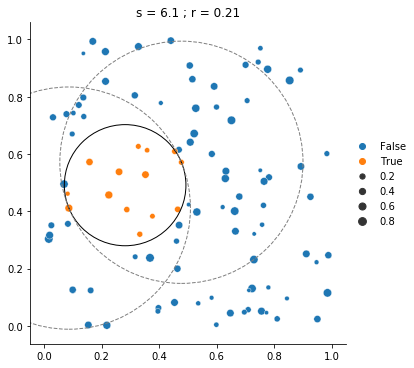

Heat up cycle 1 
Current p 0.909091
Beta : 0.064937 
Objective init 3.287478 
Objective final 2.248001 
Heat up cycle 2 
Current p 0.818182
Beta : 0.129873 
Objective init 2.248001 
Objective final 20.020962 
Heat up cycle 3 
Current p 0.727273
Beta : 0.259746 
Objective init 20.020962 
Objective final 18.567648 
Heat up cycle 4 
Current p 0.636364
Beta : 0.519492 
Objective init 18.567648 
Objective final 26.994284 
Heat up cycle 5 
Current p 0.545455
Beta : 1.038984 
Objective init 26.994284 
Objective final 26.936270 
Heat up cycle 6 
Current p 0.454545
Beta : 2.077968 
Objective init 26.936270 
Objective final 26.685330 
Heat up cycle 7 
Current p 0.363636
Beta : 4.155937 
Objective init 26.685330 
Objective final 27.756402 
Heat up cycle 8 
Current p 0.272727
Beta : 8.311873 
Objective init 27.756402 
Objective final 27.756402 
Heat up cycle 9 
Current p 0.181818
Beta : 16.623746 
Objective init 27.756402 
Objective final 27.756402 
Heat up cycle 10 
Current p 0.090909
Beta : 33.2

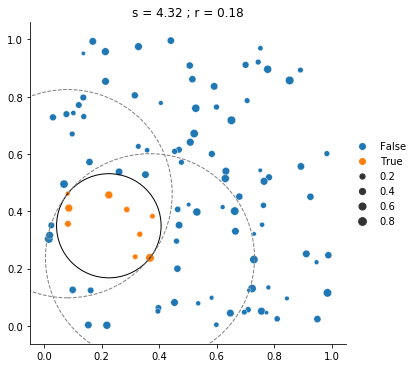

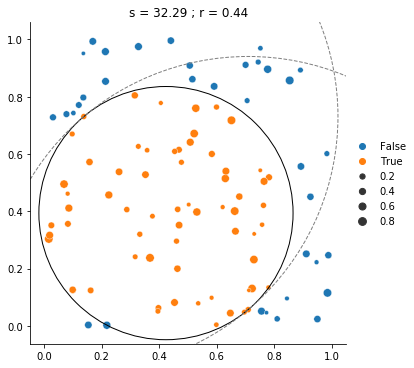

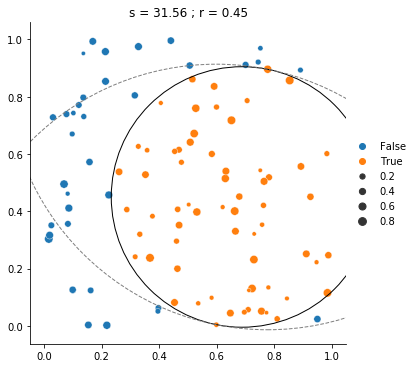

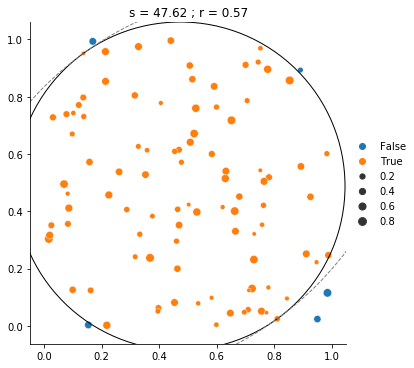

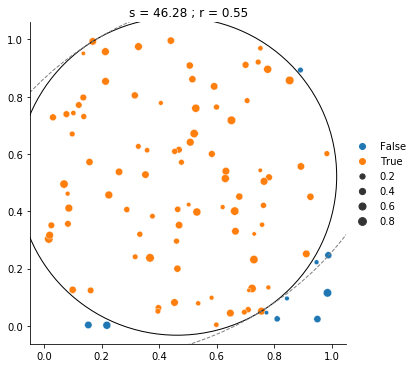

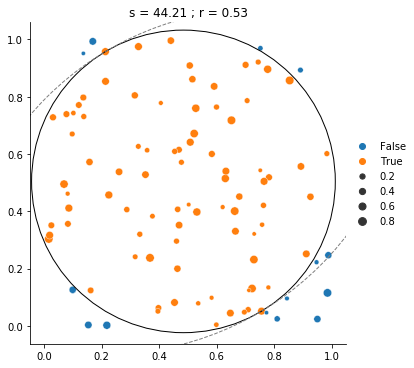

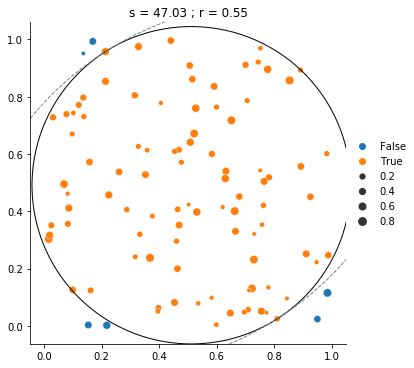

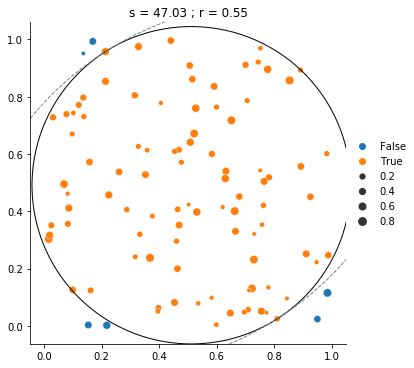

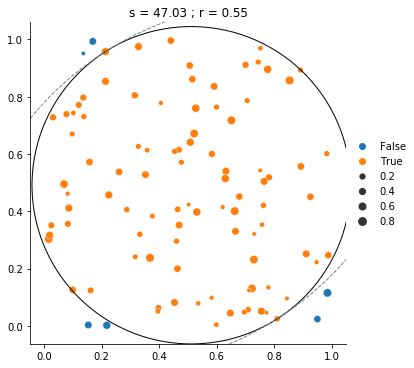

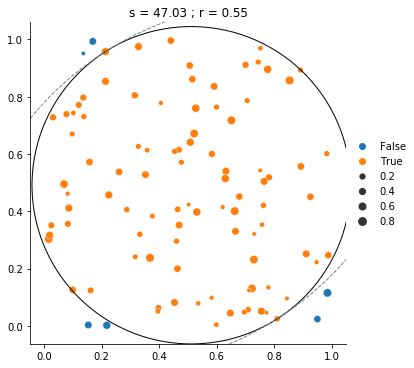

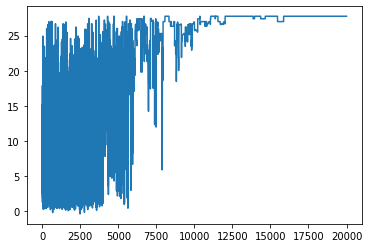

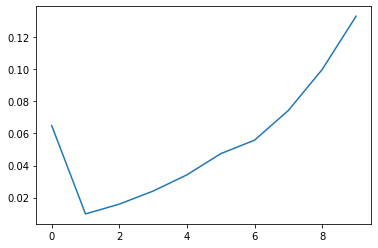

In [27]:
iterations = 2000
cycles = 10
SA = SimulatedAnnealing(0.2, g1)
# print(SA.S.get_objective())
# SA.cool_down(iterations)
# print(SA.S.get_objective())
SA.heat_cool_cycles(iterations,cycles)
plt.plot(range(iterations*cycles+1), SA.objectives)
plt.show()
SA.plot_betas()

/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
100%|██████████| 1000/1000 [00:01<00:00, 513.16it/s]
/home/spaghet/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


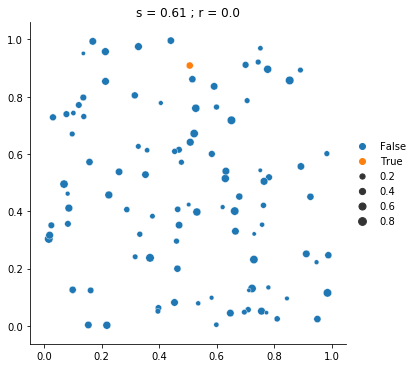

3.7885179755554286
0.607779904398227
46.68818246678009


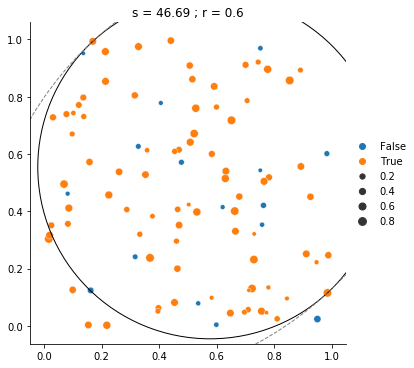

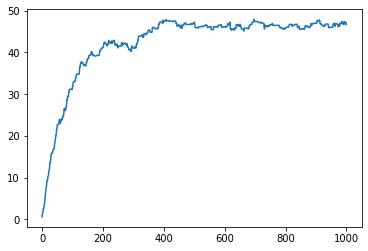

In [19]:
SA = sim_an.SimulatedAnnealing(0, g1,0.1)
print(SA.S.get_objective())
SA.cool_down(1000)
print(SA.S.get_objective())
plt.plot(range(1001), SA.objectives)
plt.show()
